In [2]:
import numpy as np
import sympy
from sympy import *
from sympy.abc import x, y
from sympy.matrices import eye
import math
from math import sin, cos, pi, e
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from _collections_abc import Iterable, Callable
%config InlineBackend.figure_format = 'retina'
sympy.init_printing()

In [3]:
def localError(x1, vect, h):
    A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
    E = eye(2)
    for i in range(1):
        k1 = A*vect
        tt = (E + 0.5*h*A)#*A*vect
        t1 = E-h*0.5*A
        t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
        k2 = t1*tt*A*vect
        #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
        t = vect + (k1 + k2)*h*0.5   
        #print(t)
    return t

Matrix([[7.00146479452941], [12.9985351078143]])
Matrix([[7.00292887380346], [12.9970709308840]])
Matrix([[7.00439223817140], [12.9956074688599]])
Matrix([[7.00585488798231], [12.9941447213927]])
Matrix([[7.00731682358509], [12.9926826881337]])
Matrix([[7.00877804532848], [12.9912213687340]])
Matrix([[7.01023855356103], [12.9897607628452]])
Matrix([[7.01169834863116], [12.9883008701189]])
Matrix([[7.01315743088707], [12.9868416902067]])
Matrix([[7.01461580067682], [12.9853832227607]])
Matrix([[7.01607345834829], [12.9839254674330]])
Matrix([[7.01753040424921], [12.9824684238758]])
Matrix([[7.01898663872711], [12.9810120917417]])
Matrix([[7.02044216212936], [12.9795564706832]])
Matrix([[7.02189697480318], [12.9781015603531]])
Matrix([[7.02335107709560], [12.9766473604045]])
Matrix([[7.02480446935348], [12.9751938704903]])
Matrix([[7.02625715192352], [12.9737410902641]])
Matrix([[7.02770912515225], [12.9722890193791]])
Matrix([[7.02916038938602], [12.9708376574891]])
Matrix([[7.030610944

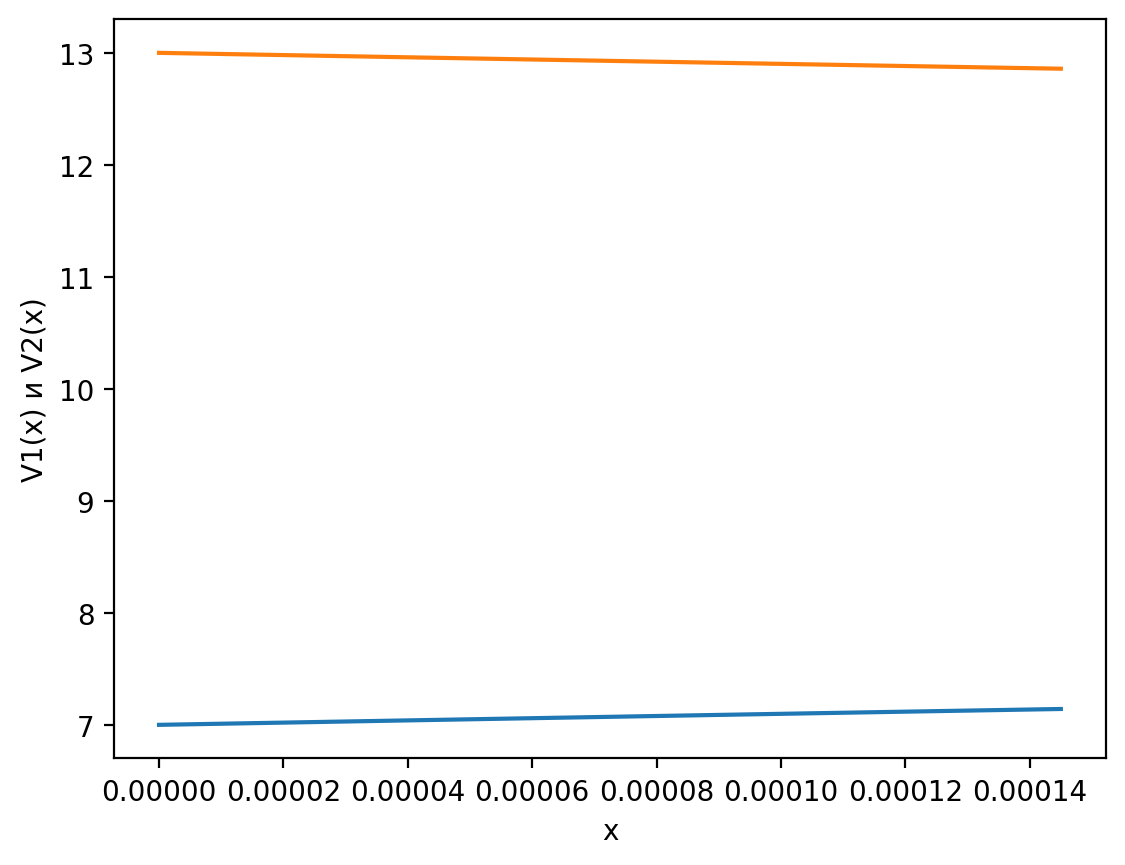

[Matrix([
[-1.19960001799937],
[ 1.20039998200063]]), Matrix([
[-1.37122857592849],
[ 1.37162856692865]]), Matrix([
[-1.24665324787824],
[ 1.24685324562826]]), Matrix([
[-0.918610287362587],
[  0.91871028680009]]), Matrix([
[-0.577418609092869],
[ 0.577468608952245]]), Matrix([
[-0.327492830507983],
[ 0.327517830472826]]), Matrix([
[-0.174996598358046],
[ 0.175009098349257]]), Matrix([
[-0.0905388892072357],
[ 0.0905451392050386]]), Matrix([
[-0.0460605884167945],
[ 0.0460637134162454]]), Matrix([
[-0.0232321244703778],
[ 0.0232336869702389]]), Matrix([
[-0.011667036431047],
[0.0116678176810154]]), Matrix([
[ -0.005846327052249],
[0.00584671767723914]]), Matrix([
[-0.00292637394108771],
[ 0.00292656925358633]]), Matrix([
[-0.0029249450002619],
[0.00292514031275933]]), Matrix([
[-0.00292351675716063],
[ 0.00292371206965688]]), Matrix([
[-0.00292208921144403],
[ 0.00292228452393791]]), Matrix([
[-0.00292066236276985],
[ 0.00292085767526373]]), Matrix([
[-0.00291923621079941],
[ 0.0029194

In [37]:
# Поиск численного решения
A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
x = []
v = []
n = 100
h = 0.006
hh = h
E = eye(2)
E
x.append(0)
tmp  = sympy.Matrix([7,13])
v.append(tmp)
eps = 0.001
i = 1
j = 0
#print(v[i-1])
#A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
#x = []
#v = []
#E = eye(2)
#x.append(0)
#tmp  = sympy.Matrix([7,13])
#v.append(tmp)
corr = []
lokEr = []
while i < n and math.isclose(v[i-1][0], 1e-3, rel_tol=1e-2) == False:
    #print(v[i-1])
    #print(h)
        
    vect = v[i-1]
    k1 = A*vect
    tt = (E + 0.5*h*A)#*A*vect
    t1 = E-h*0.5*A
    q = t1
    t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
    #print(q*t1)
    k2 = t1*tt*A*vect
    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
    t = vect + (k1 + k2)*h*0.5

    v_check = localError(x[-1], vect, h/2)
    
    S = (v_check - t)/3
    corr.append(S)
    vCorrect = t + 4*S
    
    lokEr.append(4*S)
    S1 = S[0]
    S2 = S[1]
    #S = S[1]
    if vect[0] > 0.1:
        if eps/8 <= abs(S1) <= eps and eps/8 <= abs(S2) <= eps:
            tempX = round(x[i - 1] + h, len(str(h))-2)
            x.append(tempX)
            #v.append(t)
            v.append(vCorrect)
            print(vCorrect)
            i+=1
            continue
        elif abs(S1) < eps/8 and abs(S2) < eps/8:
            j +=1
            tempX = round(x[i - 1] + h, len(str(h))-2)
            x.append(tempX)
            #v.append(t)
            v.append(vCorrect)
            print(vCorrect)
            h = h*2
            i += 1
            continue
        else:

            h = h/2
            continue
    else:
        tempX = round(x[i - 1] + h, len(str(h))-2)
        x.append(tempX)
        v.append(t)
        i+=1
    
#for i in range(1, n):
#    tempX = round(x[i - 1] + h, len(str(h))-2)
#    x.append(tempX)
#    vect = v[i-1]
#    k1 = A*vect
#    tt = (E + 0.5*h*A)#*A*vect
#    t1 = E-h*0.5*A
#    t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
#    k2 = tt*t1*A*vect
#    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
#    t = vect + (k1 + k2)*h*0.5   
#    v.append(t)
#for i in range(1, n):
#    x.append(x[i - 1] + h)
#    vect = v[i-1]
#    k1 = A*vect
#    tt = (E + 0.5*h*A)#*A*vect
#    t1 = E-h*0.5*A
#    print(tt)
#    ttt = np.linalg.inv(E).astype('float64')
#    k2 = tt*ttt
#    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
#    t = vect + (k1 + np.linalg.inv(E-h*0.5*A)*(E+h*0.5*A)*A*vect)*h*0.5   
#    v.append(t)
#    #k2 = np.linalg.inv(E - A*h*0.5)
#    
#x[2] 
time = np.linspace(0, max(x), i)

V1 = []
V2 = []
for k in range(i):
    
    V1.append(v[k][0])
    V2.append(v[k][1])
plt.plot(time, V1)
plt.plot(time, V2)
plt.xlabel('x')
plt.ylabel('V1(x) и V2(x)')
plt.show()
#print(corr)

print(lokEr)




⎡⎡6.99999999999999⎤  ⎡7.00439116843471⎤  ⎡7.00877590898719⎤  ⎡7.01315423106638
⎢⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                
⎣⎣      13.0      ⎦  ⎣12.9956085385965⎦  ⎣12.9912235050752⎦  ⎣12.9868448900272

⎤  ⎡7.01752614406747⎤  ⎡7.02189165737188⎤  ⎡7.0262507803473⎤  ⎡7.0306035223477
⎥, ⎢                ⎥, ⎢                ⎥, ⎢               ⎥, ⎢               
⎦  ⎣12.9824726840573⎦  ⎣12.9781068777842⎦  ⎣12.97374746184 ⎦  ⎣12.969394426870

2⎤  ⎡7.03494989271343⎤  ⎡7.03928990077104⎤  ⎡7.04362355583352⎤  ⎡7.04795086720
 ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢             
8⎦  ⎣12.9650477635363⎦  ⎣12.9607074625099⎦  ⎣12.9563735144787⎦  ⎣12.9520459101

021⎤  ⎡7.05227184415683⎤  ⎡7.0565864959755 ⎤  ⎡7.06089483191479⎤  ⎡7.065196861
   ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢           
432⎦  ⎣12.9477246402179⎦  ⎣12.9434096954304⎦  ⎣12.9391010665224⎦  ⎣12.93479874

2197 ⎤  ⎡7.0694925931217⎤  ⎡7.07378203683876⎤  ⎡

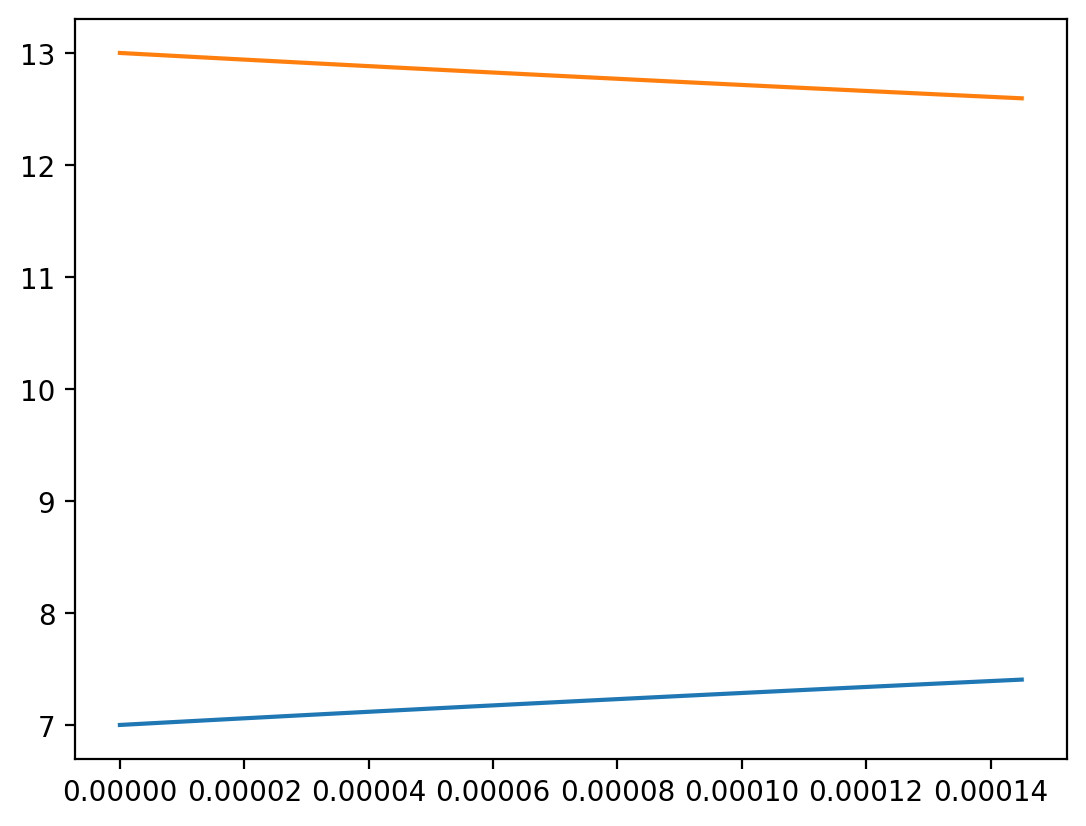

In [38]:
# Поиск точного решения
u = []
A = sympy.Matrix(A)
temp = A.eigenvects()
alfa1 = 250000000000000/58925565098879
alfa2 = -2500000000000000/176776695296637
lambda1 = temp[0][0]
lambda2 = temp[1][0]
W1 = temp[0][2][0]
W2 = temp[1][2][0]
x1  = x
n = i
for i in range(n):
    
    t = alfa1*W1*e**(lambda1*x1[i]) + alfa2*W2*e**(lambda2*x1[i])
    u.append(t)
U1 = []
U2 = []
time = np.linspace(0, max(x1), n)
for i in range(n):
    U1.append(u[i][0])
    U2.append(u[i][1])
plt.plot(time, U1)
plt.plot(time, U2)
u

In [39]:
# Расчет глобальной погрешности
E_1 = []
E_2 = []
for i in range(n):
    E_1.append(u[i][0] - v[i][0])
    E_2.append(u[i][1] - v[i][1])
print(E_2)


[-8.88178419700125e-15, -0.00292656921787149, -0.00584742580884345, -0.00876257883263420, -0.0116720373353481, -0.0145758103495073, -0.0174739068940681, -0.0203663359744546, -0.0232531065825619, -0.0261342276967795, -0.0290097082820253, -0.0318795572897450, -0.0347437836579552, -0.0376023963112324, -0.0404554041607632, -0.0433028161043474, -0.0461446410264248, -0.0489808877980860, -0.0518115652771023, -0.0546366823079403, -0.0574562477217828, -0.0602702703365470, -0.0630787589569035, -0.0658817223743018, -0.0686791693669786, -0.0714711086999920, -0.0742575491252300, -0.0770384993814250, -0.0798139681941947, -0.0825839642760364, -0.0853484963263647, -0.0881075730315288, -0.0908612030648097, -0.0936093950864745, -0.0963521577437678, -0.0990894996709475, -0.101821429489288, -0.104547955807123, -0.107269087219837, -0.109984832309904, -0.112695199646900, -0.115400197787526, -0.118099835275615, -0.120794120642167, -0.123483062405359, -0.126166669070562, -0.128844949130368, -0.131517911064599

: 